Marathon Project ML

PHASE 1: Receive Data and Data Visual
Import the necessary libraries

In [1]:
import io
import pandas as pd
url = 'https://raw.githubusercontent.com/rafa794/Marathon_Time_Prediction_ML_Project/5123e6ed36f8481e2510ec2c491126ae6da2bc13/MarathonData.csv'
datos_maraton = pd.read_csv(url)
datos_maraton

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


Get the 'Name' column from the dataframe

In [2]:
datos_maraton['Name']

0         Blair MORGAN
1        Robert Heczko
2        Michon Jerome
3        Daniel Or lek
4         Luk ? Mr zek
            ...       
82    Stefano Vegliani
83      Andrej Madliak
84          Yoi Ohsako
85          Simon Dunn
86         Pavel ?imek
Name: Name, Length: 87, dtype: object

In [3]:
datos_maraton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


Convert the 'Wall21' column to numeric data type and replace non-numeric values with NaN


In [4]:
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'], errors ='coerce')

Display statistical information about the dataframe

In [5]:
datos_maraton.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


Display histograms of the columns in the dataframe

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

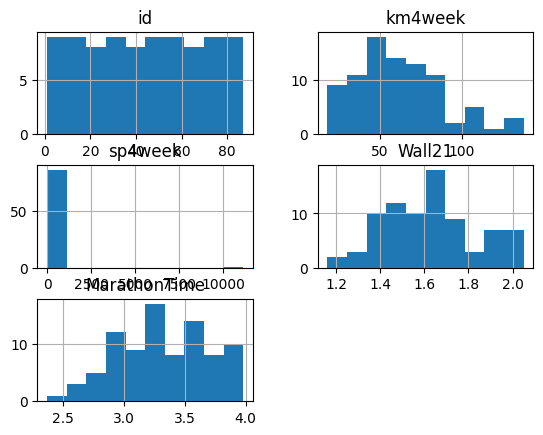

In [6]:
datos_maraton.hist()

Remove unnecessary columns from the dataframe

In [7]:
datos_maraton = datos_maraton.drop(columns=['Name'])
datos_maraton = datos_maraton.drop(columns=['id'])
datos_maraton = datos_maraton.drop(columns=['Marathon'])
datos_maraton = datos_maraton.drop(columns=['CATEGORY'])
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


Count the number of missing values in each column

In [8]:
datos_maraton.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

Fill missing values in the 'CrossTraining' column with 0

In [9]:
datos_maraton['CrossTraining'] = datos_maraton['CrossTraining'].fillna(0)
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


Drop any rows with missing values

In [10]:
datos_maraton = datos_maraton.dropna(how='any')
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


Display unique values in the 'CrossTraining' column

In [11]:
datos_maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

Replace string values in the 'CrossTraining' column with numerical values

In [12]:
valores_cross = {'CrossTraining': {'ciclista 1h' : 1, 'ciclista 3h' : 2, 'ciclista 4h' : 3, 'ciclista 5h': 4, 'ciclista 13h': 5, 'M50': 6}}
datos_maraton.replace(valores_cross, inplace = True)
datos_maraton

C:\Users\rafam\AppData\Local\Temp\ipykernel_12688\3103510115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_maraton.replace(valores_cross, inplace = True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


Replace string values in the 'Category' column with numerical values

In [13]:
valores_cross = {'Category': {'MAM' : 1, 'M45' : 2, 'M40' : 3, 'WAM': 4, 'M55': 5, 'M50' : 6}}
datos_maraton.replace(valores_cross, inplace = True)
datos_maraton

C:\Users\rafam\AppData\Local\Temp\ipykernel_12688\3392002489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_maraton.replace(valores_cross, inplace = True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


Plot a scatter plot of 'km4week' vs 'MarathonTime', then the same with 'km3week', 'sp4week' and 'Wall21'

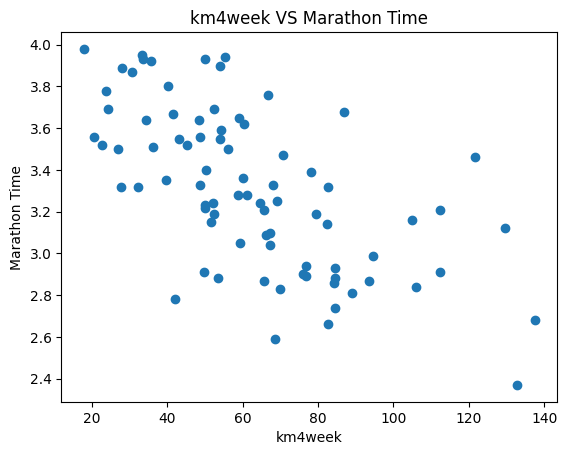

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['km4week'], y = datos_maraton['MarathonTime'])
plt.title('km4week VS Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()


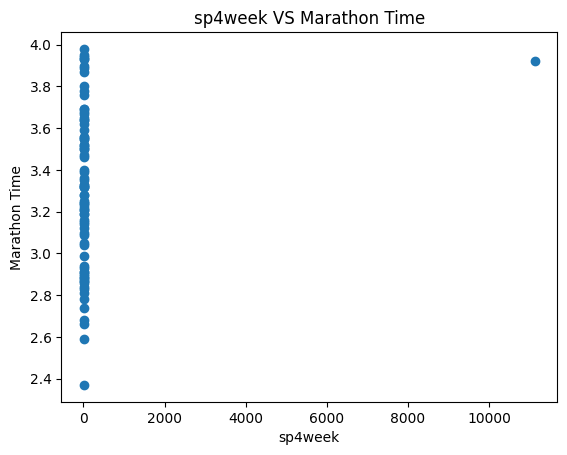

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['sp4week'], y = datos_maraton['MarathonTime'])
plt.title('sp4week VS Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

Remove rows where 'sp4week' is greater than 1000

In [16]:
datos_maraton = datos_maraton.query('sp4week<1000')

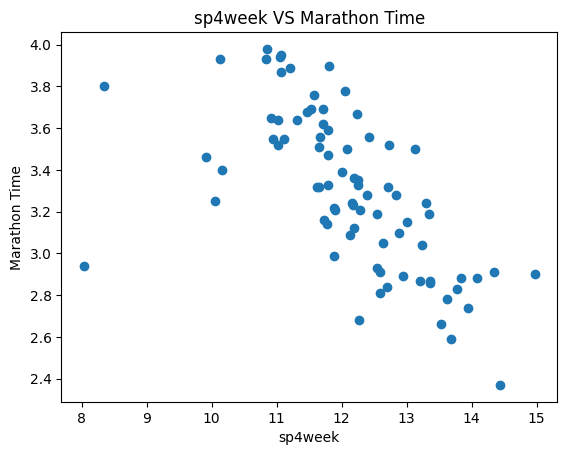

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['sp4week'], y = datos_maraton['MarathonTime'])
plt.title('sp4week VS Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

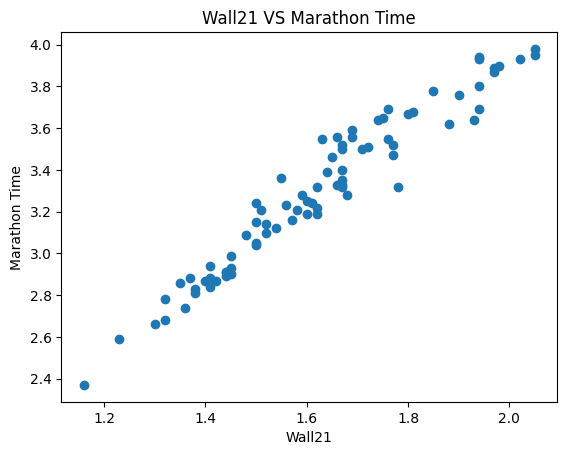

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['Wall21'], y = datos_maraton['MarathonTime'])
plt.title('Wall21 VS Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

In [19]:
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


PHASE 2: Model Training

Selecting 80% of the data for training and remaining 20% for testing

In [20]:
datos_entrenamiento = datos_maraton.sample(frac=0.8,random_state=0)
datos_test = datos_maraton.drop(datos_entrenamiento.index)

In [21]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


Removing the target variable 'MarathonTime' from the training and testing datasets

In [22]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime') 

In [23]:
etiquetas_entrenamiento

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

Creating a Linear Regression model and fitting it to the training data

In [24]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

Making predictions on the testing data using the trained model

In [ ]:
predicciones = modelo.predict(datos_test)
predicciones

Calculating the root mean squared error between the predicted and actual values

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Creating a new DataFrame for a new runner

In [ ]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,15,0,1.4]]), columns=['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21'])
nuevo_corredor

Making predictions for the new runner using the trained model

In [ ]:
modelo.predict(nuevo_corredor)